In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# Read in the average season stats data
df = pd.read_csv("./seasonStats.csv")

# Get only the entries with useful data
df = df.loc[df["AVGFGA3"] > 0.0]

# All of the stats we have data for
statsToMeasure = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]

# All of the average stats
averageStats = ["AVG" + stat for stat in statsToMeasure]

# All of opponent average stats
oAverageStats = ["O" + stat for stat in averageStats]

# All of the ratio stats
ratStats = ["RAT" + stat for stat in statsToMeasure]

# Hold all stats
allStats = averageStats + oAverageStats + ratStats

In [3]:
avgData = df[allStats + ["Season"]].groupby("Season", as_index=False).mean()
avgData.head()

Season   AVGScore     AVGFGM     AVGFGA   AVGFGM3    AVGFGA3     AVGFTM  \
0    2003  69.680464  24.550438  56.093181  6.254943  18.051239  14.324645   
1    2004  68.918157  24.225984  55.672247  6.267614  18.209258  14.198576   
2    2005  68.574709  24.169609  55.479298  6.324953  18.282449  13.910539   
3    2006  68.551457  24.157309  55.348500  6.396786  18.365292  13.840053   
4    2007  68.691924  24.122084  54.946908  6.542866  18.799819  13.904890   

      AVGFTA      AVGOR      AVGDR  ...   RATFGA3    RATFTM    RATFTA  \
0  20.621980  11.728868  23.101065  ...  1.013647  1.017097  1.014812   
1  20.654079  11.711162  23.117588  ...  1.014798  1.018551  1.016438   
2  20.263312  11.637925  22.987820  ...  1.017564  1.019955  1.017746   
3  20.005978  11.661747  22.739128  ...  1.014115  1.019675  1.017147   
4  20.149440  11.367412  22.686938  ...  1.014670  1.018063  1.015194   

      RATOR     RATDR    RATAst     RATTO    RATStl    RATBlk     RATPF  
0  1.006165  1.005100  1.011933  1.013262  1.022224  1.033548  1.005892  
1  1.007489  1.005428  1.011212  1.014904  1.021253  1.031497  1.005363  
2  1.007424  1.006377  1.011269  1.014677  1.021817  1.037969  1.005799  
3  1.007658  1.004799  1.011394  1.013818  1.021316  1.029246  1.005935  
4  1.007714  1.006356  1.012001  1.012318  1.022117  1.025711  1.006497  

[5 rows x 43 columns]

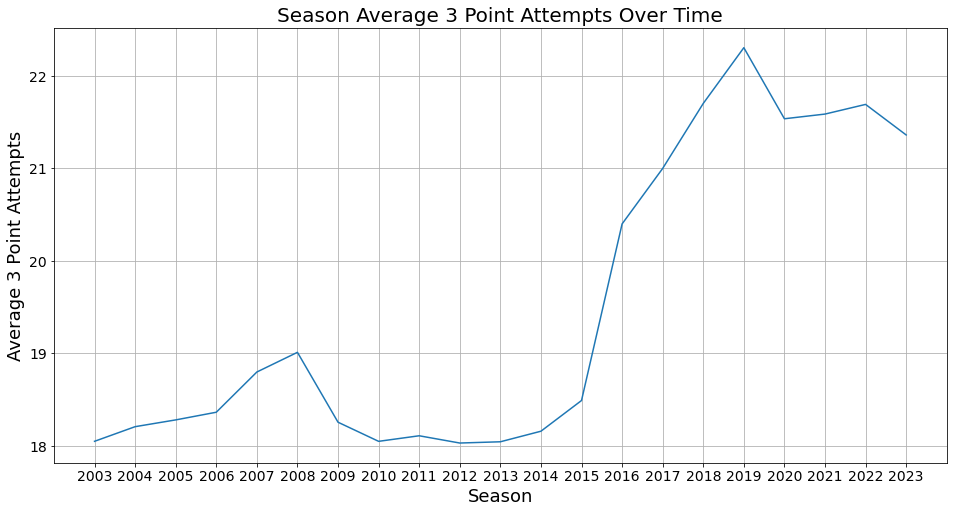

In [4]:
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

fig, ax = plt.subplots(figsize = (16,8))

ax.plot(avgData["Season"], avgData["AVGFGA3"])
ax.set_xticks([x for x in range(2003, 2024)])
ax.set_xlabel("Season", size=18)
ax.set_ylabel("Average 3 Point Attempts", size=18)
ax.set_title("Season Average 3 Point Attempts Over Time", size = 20)

plt.savefig("./plots/seasonAverage3OverTime.png", dpi=250)
plt.grid()
plt.show()

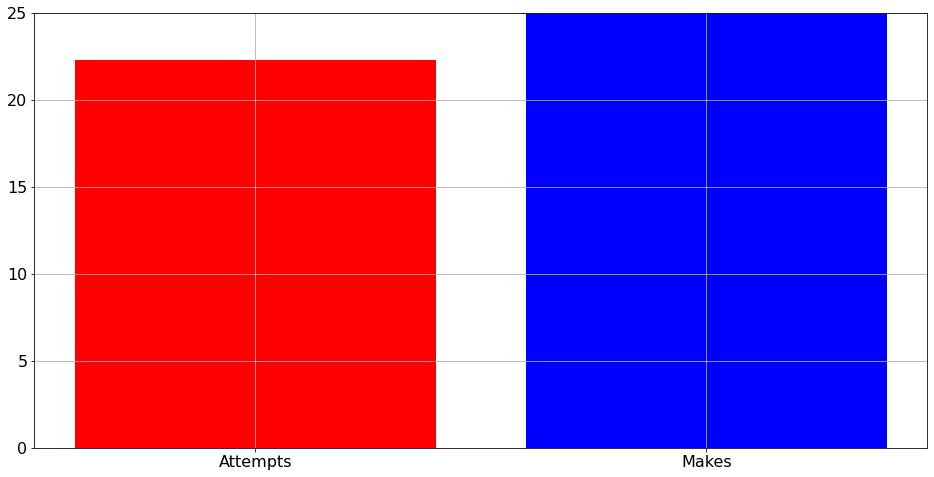

In [5]:
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

from matplotlib.animation import FuncAnimation
barStuff = np.zeros((21,2))


for i, season in avgData.iterrows():
    barStuff[i][0] = season["AVGFGA3"]
    barStuff[i][1] = season["AVGFGA"]
    

def animate(frame):
    ax.bar(["Attempts","Makes"], [barStuff[frame][0], barStuff[frame][1]], color=["red", "blue"])

fig, ax = plt.subplots(figsize=(16,8))

ax.set_ylim(0,25)
ax.grid()

animation = FuncAnimation(fig, animate, frames=21,interval=200)

animation.save("./animations/test.gif", writer="pillow")

In [6]:
names = pd.read_csv("./data/MTeams.csv")
games = pd.read_csv("./data/MRegularSeasonDetailedResults.csv")

In [7]:
scoreDifferences = {}

for i, game in games.iterrows():
    if (game["WScore"] - game["LScore"] in scoreDifferences):              
        scoreDifferences[game["WScore"] - game["LScore"]] += 1
    else:
        scoreDifferences[game["WScore"] - game["LScore"]] = 1

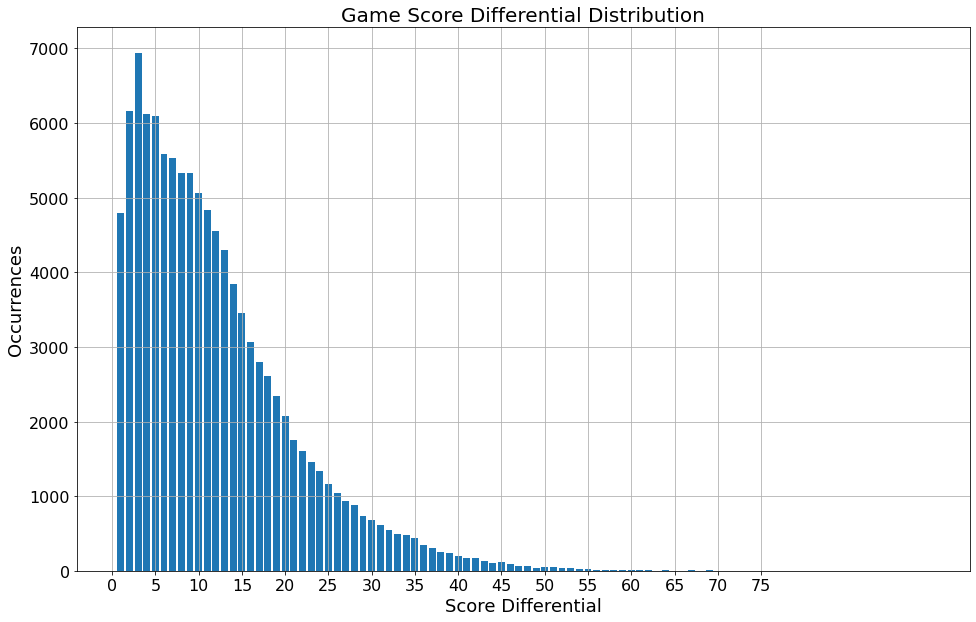

In [8]:
fig, ax = plt.subplots(figsize = (16,10))

ax.bar(scoreDifferences.keys(), scoreDifferences.values())
ax.set_xticks(np.arange(0,76,5))
ax.set_xlabel("Score Differential", size=18)
ax.set_ylabel("Occurrences", size=18)
ax.set_title("Game Score Differential Distribution", size = 20)

ax.grid()

plt.savefig("./plots/ScoreDifferential.png", dpi=250)

plt.show()

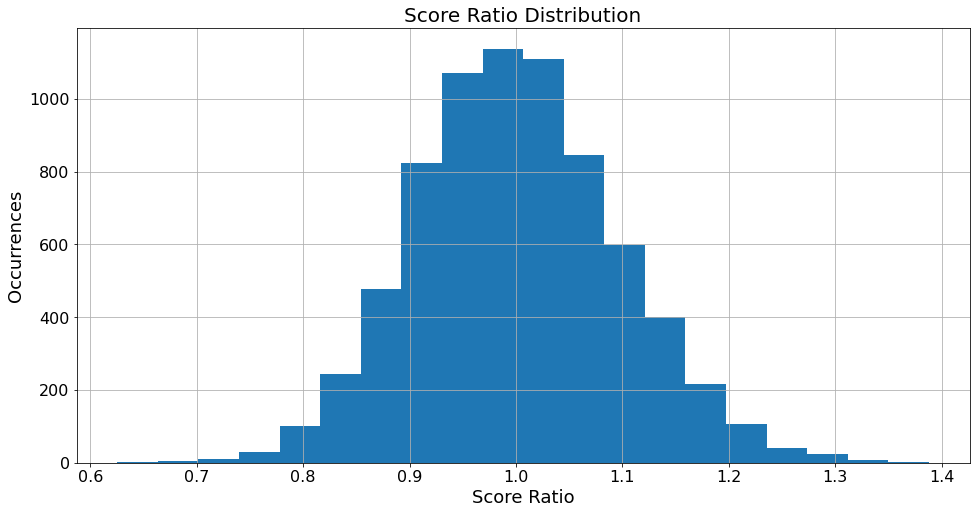

In [9]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(df["RATScore"], bins=20)
#ax.set_xticks(np.arange(0,76,5))
ax.set_xlabel("Score Ratio", size=18)
ax.set_ylabel("Occurrences", size=18)
ax.set_title("Score Ratio Distribution", size = 20)

ax.grid()

plt.savefig("./plots/ScoreRatioDist.png", dpi=250)

plt.show()

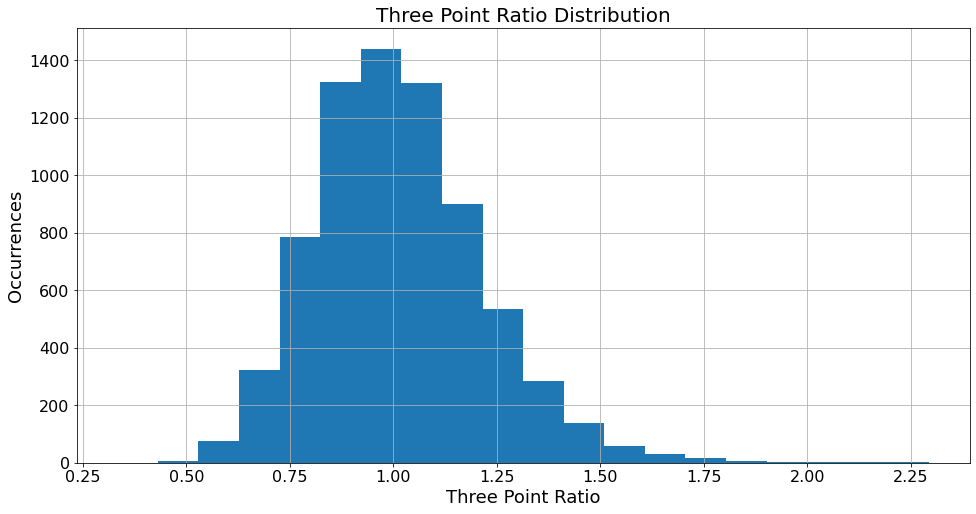

In [10]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(df["RATFGA3"], bins=20)
#ax.set_xticks(np.arange(0,76,5))
ax.set_xlabel("Three Point Ratio", size=18)
ax.set_ylabel("Occurrences", size=18)
ax.set_title("Three Point Ratio Distribution", size = 20)

ax.grid()

plt.savefig("./plots/ThreePointRatioDist.png", dpi=250)

plt.show()

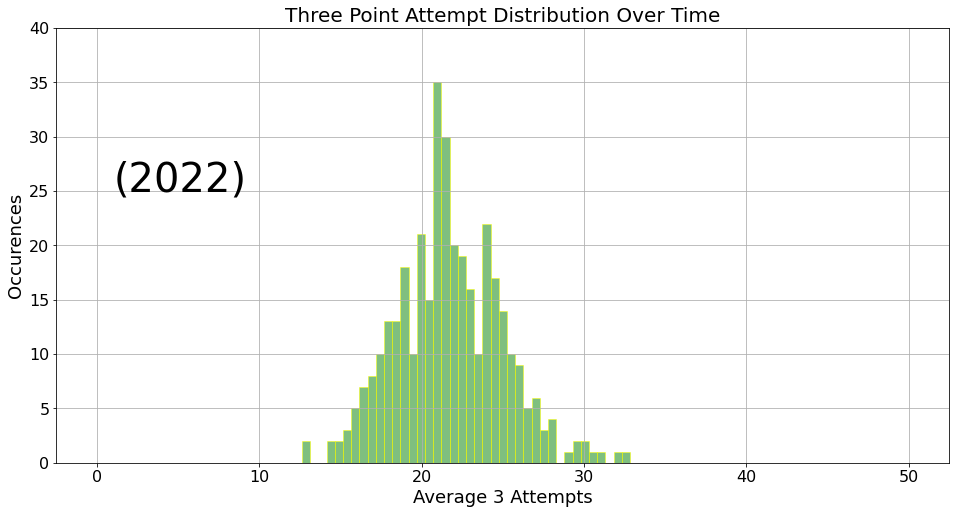

In [19]:
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(16,8))


HIST_BINS = np.linspace(0,50, 100)

_, _, bar_container = ax.hist(df["AVGFGA3"], HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)




def animate(frame):
    currDf = df.loc[df["Season"] == 2003 + (frame - 1)]
    n, _ = np.histogram(currDf["AVGFGA3"], HIST_BINS)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)
    title.set_text(f"({2003 + frame - 1})")
    return bar_container.patches


title = ax.text(1,25,f"({2003})", size=40)  

ax.set_xlabel("Average 3 Attempts", size=18)
ax.set_ylabel("Occurences", size = 18)
ax.set_title("Three Point Attempt Distribution Over Time", size = 20)
ax.set_ylim(0,40)
# ax.set_xlim(5,40)
ax.grid()

animation = FuncAnimation(fig, animate, frames=21,interval=500, blit=True)

animation.save("./animations/ThreeAttemptAnim.gif", writer="pillow", dpi=250)

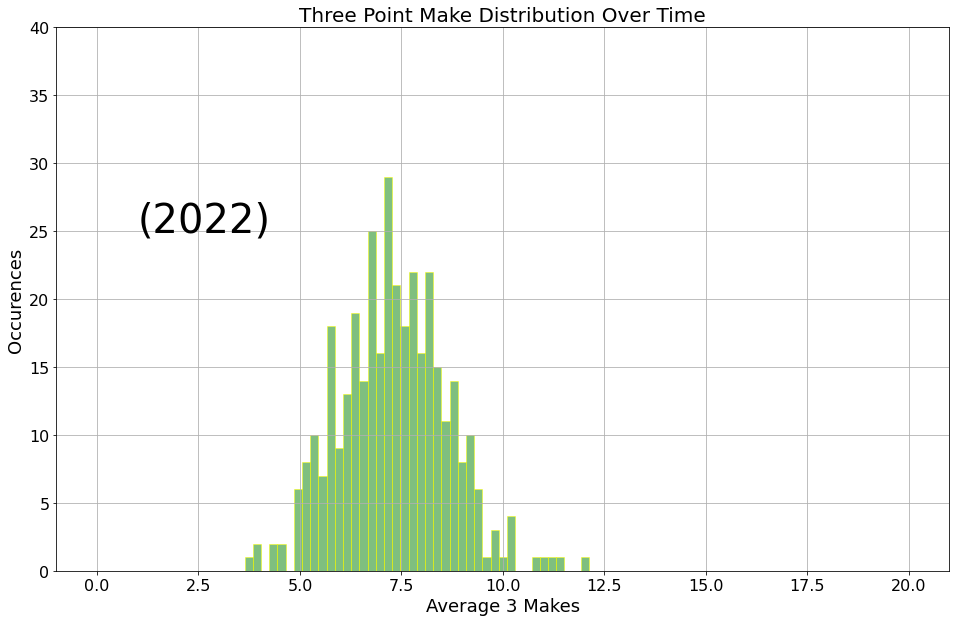

In [12]:
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(16,10))


HIST_BINS = np.linspace(0,20, 100)

_, _, bar_container = ax.hist(df["AVGFGM3"], HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)




def animate(frame):
    currDf = df.loc[df["Season"] == 2003 + (frame - 1)]
    n, _ = np.histogram(currDf["AVGFGM3"], HIST_BINS)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)
    title.set_text(f"({2003 + frame - 1})")
    return bar_container.patches


title = ax.text(1,25,f"({2003})", size=40)  

ax.set_xlabel("Average 3 Makes", size=18)
ax.set_ylabel("Occurences", size = 18)
ax.set_title("Three Point Make Distribution Over Time", size = 20)
ax.set_ylim(0,40)
ax.grid()

animation = FuncAnimation(fig, animate, frames=21,interval=500, blit=True)

animation.save("./animations/ThreeMakesDistAnim.gif", writer="pillow", dpi=250)

In [14]:
games.shape

(107634, 34)

In [20]:
df.columns

Index(['Unnamed: 0', 'Season', 'TeamID', 'GamesWon', 'HighDay', 'AVGScore',
       'AVGFGM', 'AVGFGA', 'AVGFGM3', 'AVGFGA3', 'AVGFTM', 'AVGFTA', 'AVGOR',
       'AVGDR', 'AVGAst', 'AVGTO', 'AVGStl', 'AVGBlk', 'AVGPF', 'OAVGScore',
       'OAVGFGM', 'OAVGFGA', 'OAVGFGM3', 'OAVGFGA3', 'OAVGFTM', 'OAVGFTA',
       'OAVGOR', 'OAVGDR', 'OAVGAst', 'OAVGTO', 'OAVGStl', 'OAVGBlk', 'OAVGPF',
       'RATScore', 'RATFGM', 'RATFGA', 'RATFGM3', 'RATFGA3', 'RATFTM',
       'RATFTA', 'RATOR', 'RATDR', 'RATAst', 'RATTO', 'RATStl', 'RATBlk',
       'RATPF'],
      dtype='object')